In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [107]:
train_data = pd.read_csv("dataset/train_u6lujuX_CVtuZ9i.csv")
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [108]:
train_data.shape

(614, 13)

In [109]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
train_data.drop(["Loan_ID","Dependents"], axis=1, inplace=True)


In [113]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [114]:
train_data.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
cols = train_data[["Gender","Married","Self_Employed"]]
for i in cols:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [116]:
train_data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [117]:
n_cols = train_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]
for i in n_cols:
    train_data[i] = train_data[i].fillna(train_data[i].mean())

In [118]:
train_data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [119]:
def bar_chart(col): 
    Approved = train_data[train_data["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = train_data[train_data["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

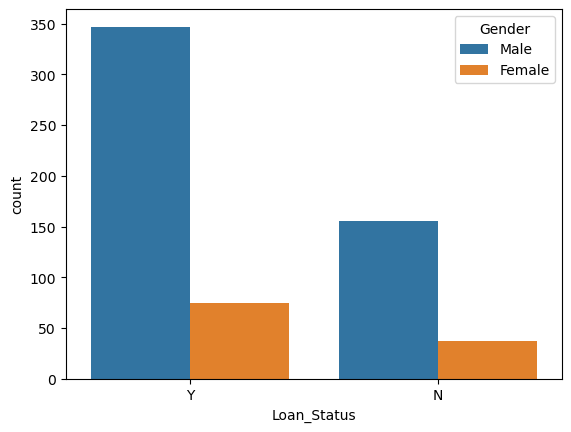

In [120]:
sns.countplot(x='Loan_Status', hue='Gender', data=train_data)

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

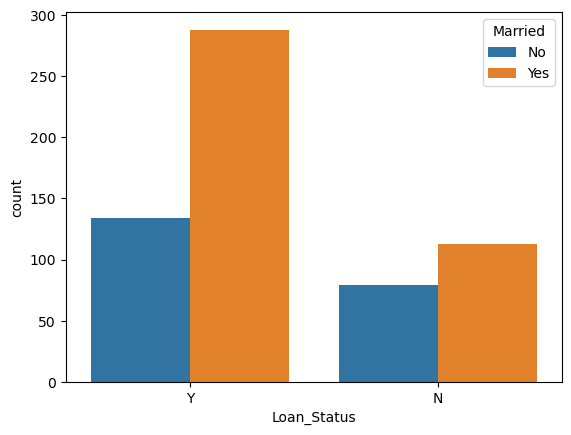

In [121]:
sns.countplot(x='Loan_Status', hue='Married', data=train_data)

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

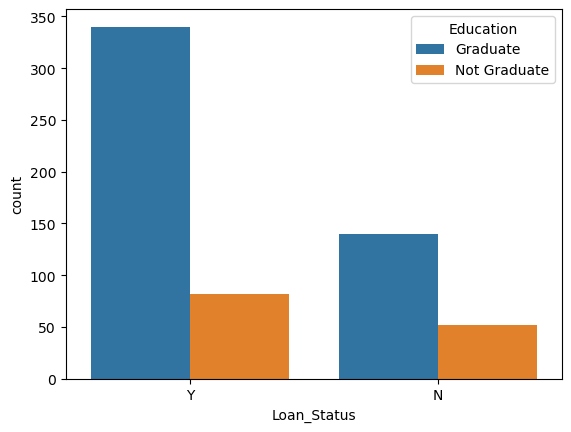

In [122]:
sns.countplot(x='Loan_Status', hue='Education', data=train_data)

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

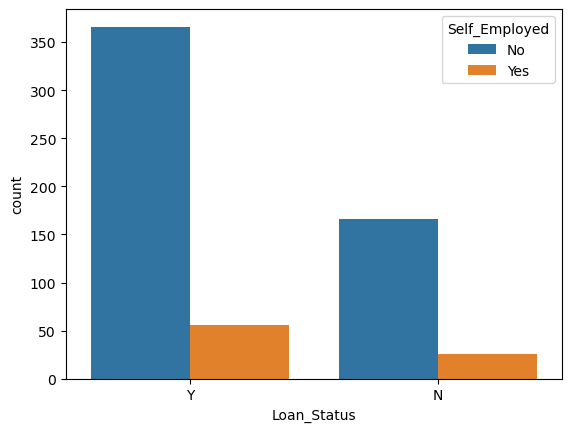

In [123]:
sns.countplot(x='Loan_Status', hue='Self_Employed', data=train_data)

In [124]:
train_data.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [125]:
train_data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [126]:
train_data['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [127]:
train_data['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)

In [128]:
train_data['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [129]:
train_data['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'], [0, 1, 2], inplace=True)

In [130]:
train_data['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)

In [131]:
train_data.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
5,0,1,1,1,5417,4196.0,267.000000,360.0,1.0,0,1
6,0,1,0,0,2333,1516.0,95.000000,360.0,1.0,0,1
7,0,1,1,0,3036,2504.0,158.000000,360.0,0.0,2,0
8,0,1,1,0,4006,1526.0,168.000000,360.0,1.0,0,1
9,0,1,1,0,12841,10968.0,349.000000,360.0,1.0,2,0


In [132]:
X = train_data.drop("Loan_Status", axis=1) 
y = train_data["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
y_train.shape

(491,)

In [133]:
X_train.shape

(491, 10)

In [134]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_train)

In [135]:
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))

Precision: 0.802
Accuracy: 0.823


In [136]:
y_test_pred = logr.predict(X_test)

In [137]:
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

Precision: 0.755
Accuracy: 0.756


In [139]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_train)
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Recall: %.3f' % recall_score(y_train, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000


In [140]:
y_test_pred = xgb.predict(X_test)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

Precision: 0.785
Recall: 0.869
Accuracy: 0.748


In [141]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_train)
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))

Precision: 0.691
Accuracy: 0.692


In [142]:
y_test_pred = sv.predict(X_test)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

Precision: 0.683
Accuracy: 0.683


In [143]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Recall: %.3f' % recall_score(y_train, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000


In [144]:
y_test_pred = rf.predict(X_test)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

Precision: 0.772
Recall: 0.929
Accuracy: 0.764


In [145]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_train)
print('Precision: %.3f' % precision_score(y_train, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred))

Precision: 1.000
Accuracy: 1.000


In [146]:
y_test_pred = dtc.predict(X_test)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred))

Precision: 0.769
Accuracy: 0.715


In [147]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))